# Import

In [2]:
import seaborn as sns
from pandas import melt, read_csv

# Read CSV

In [3]:
df = read_csv(
    "results/RMP_29-01-24.csv",
    dtype={
        "N_tr": "category",
        "N_te": "category",
        "M": "category",
        "K_o": "category",
        "K_e": "category",
        # "N_bc": "category",
        "Method": "category",
        "Original model": "category",
        "Elicited model": "category",
    },
)
# df = df[df["N_bc"] != 2000]

FileNotFoundError: [Errno 2] No such file or directory: 'results/RMP_29-01-24.csv'

In [4]:
import numpy as np

seeds = df["Seed"]
print(np.unique(seeds))

NameError: name 'df' is not defined

# Plot

<Axes.ArtistList of 15 lines>
[ 100.  300.  500. 1000. 2000.]
[ 966.36869687 1024.02919339 1059.1486953  1099.59762845 1143.29043462]
[100.0 300.0 500.0 1000.0 2000.0]
[966.36869686774 1024.0291933861602 1059.1486953018202 1099.59762844904
 1143.29043462426]
[100.0 300.0 500.0 1000.0 2000.0]
[962.7179845047987 1019.070338074704 1053.9577931801387 1093.6968387927561
 1136.7022307026964]
[100.0 300.0 500.0 1000.0 2000.0]
[968.7433508848816 1027.0737403209916 1062.6540086219313 1103.08899463647
 1147.2597306890925]
[ 100.  300.  500. 1000. 2000.]
[1008.82129726 1103.54114149 1156.93926358 1212.12361502 1254.27318273]
[100.0 300.0 500.0 1000.0 2000.0]
[1008.82129725672 1103.54114148932 1156.93926357896 1212.1236150247998
 1254.2731827255]
[100.0 300.0 500.0 1000.0 2000.0]
[1002.7989139238209 1096.28318854723 1149.2642988965495 1203.52451853607
 1244.3275396031186]
[100.0 300.0 500.0 1000.0 2000.0]
[1012.2268942473069 1107.969281518978 1161.8478277922175 1217.475466936525
 1260.149552025109

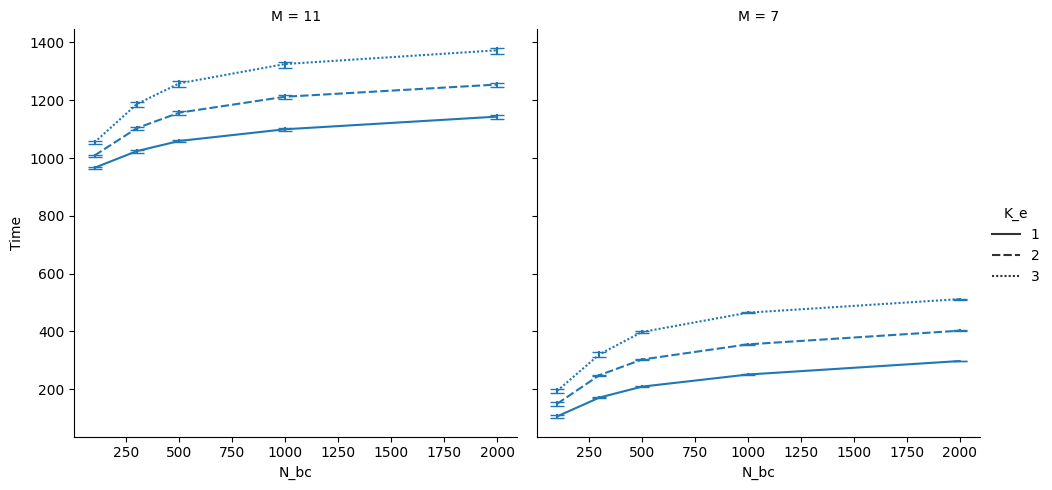

In [4]:
g = sns.relplot(
    data=df[(df["K_o"] == df["K_e"]) & (df["Error"] == 0)],
    x="N_bc",
    y="Time",
    style="K_e",
    col="M",
    # col_order=["7", "11", "15"],
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

for ax in g.axes.flat:
    print(ax.lines)
    for line in ax.lines:
        print(line.get_xdata())
        print(line.get_ydata())

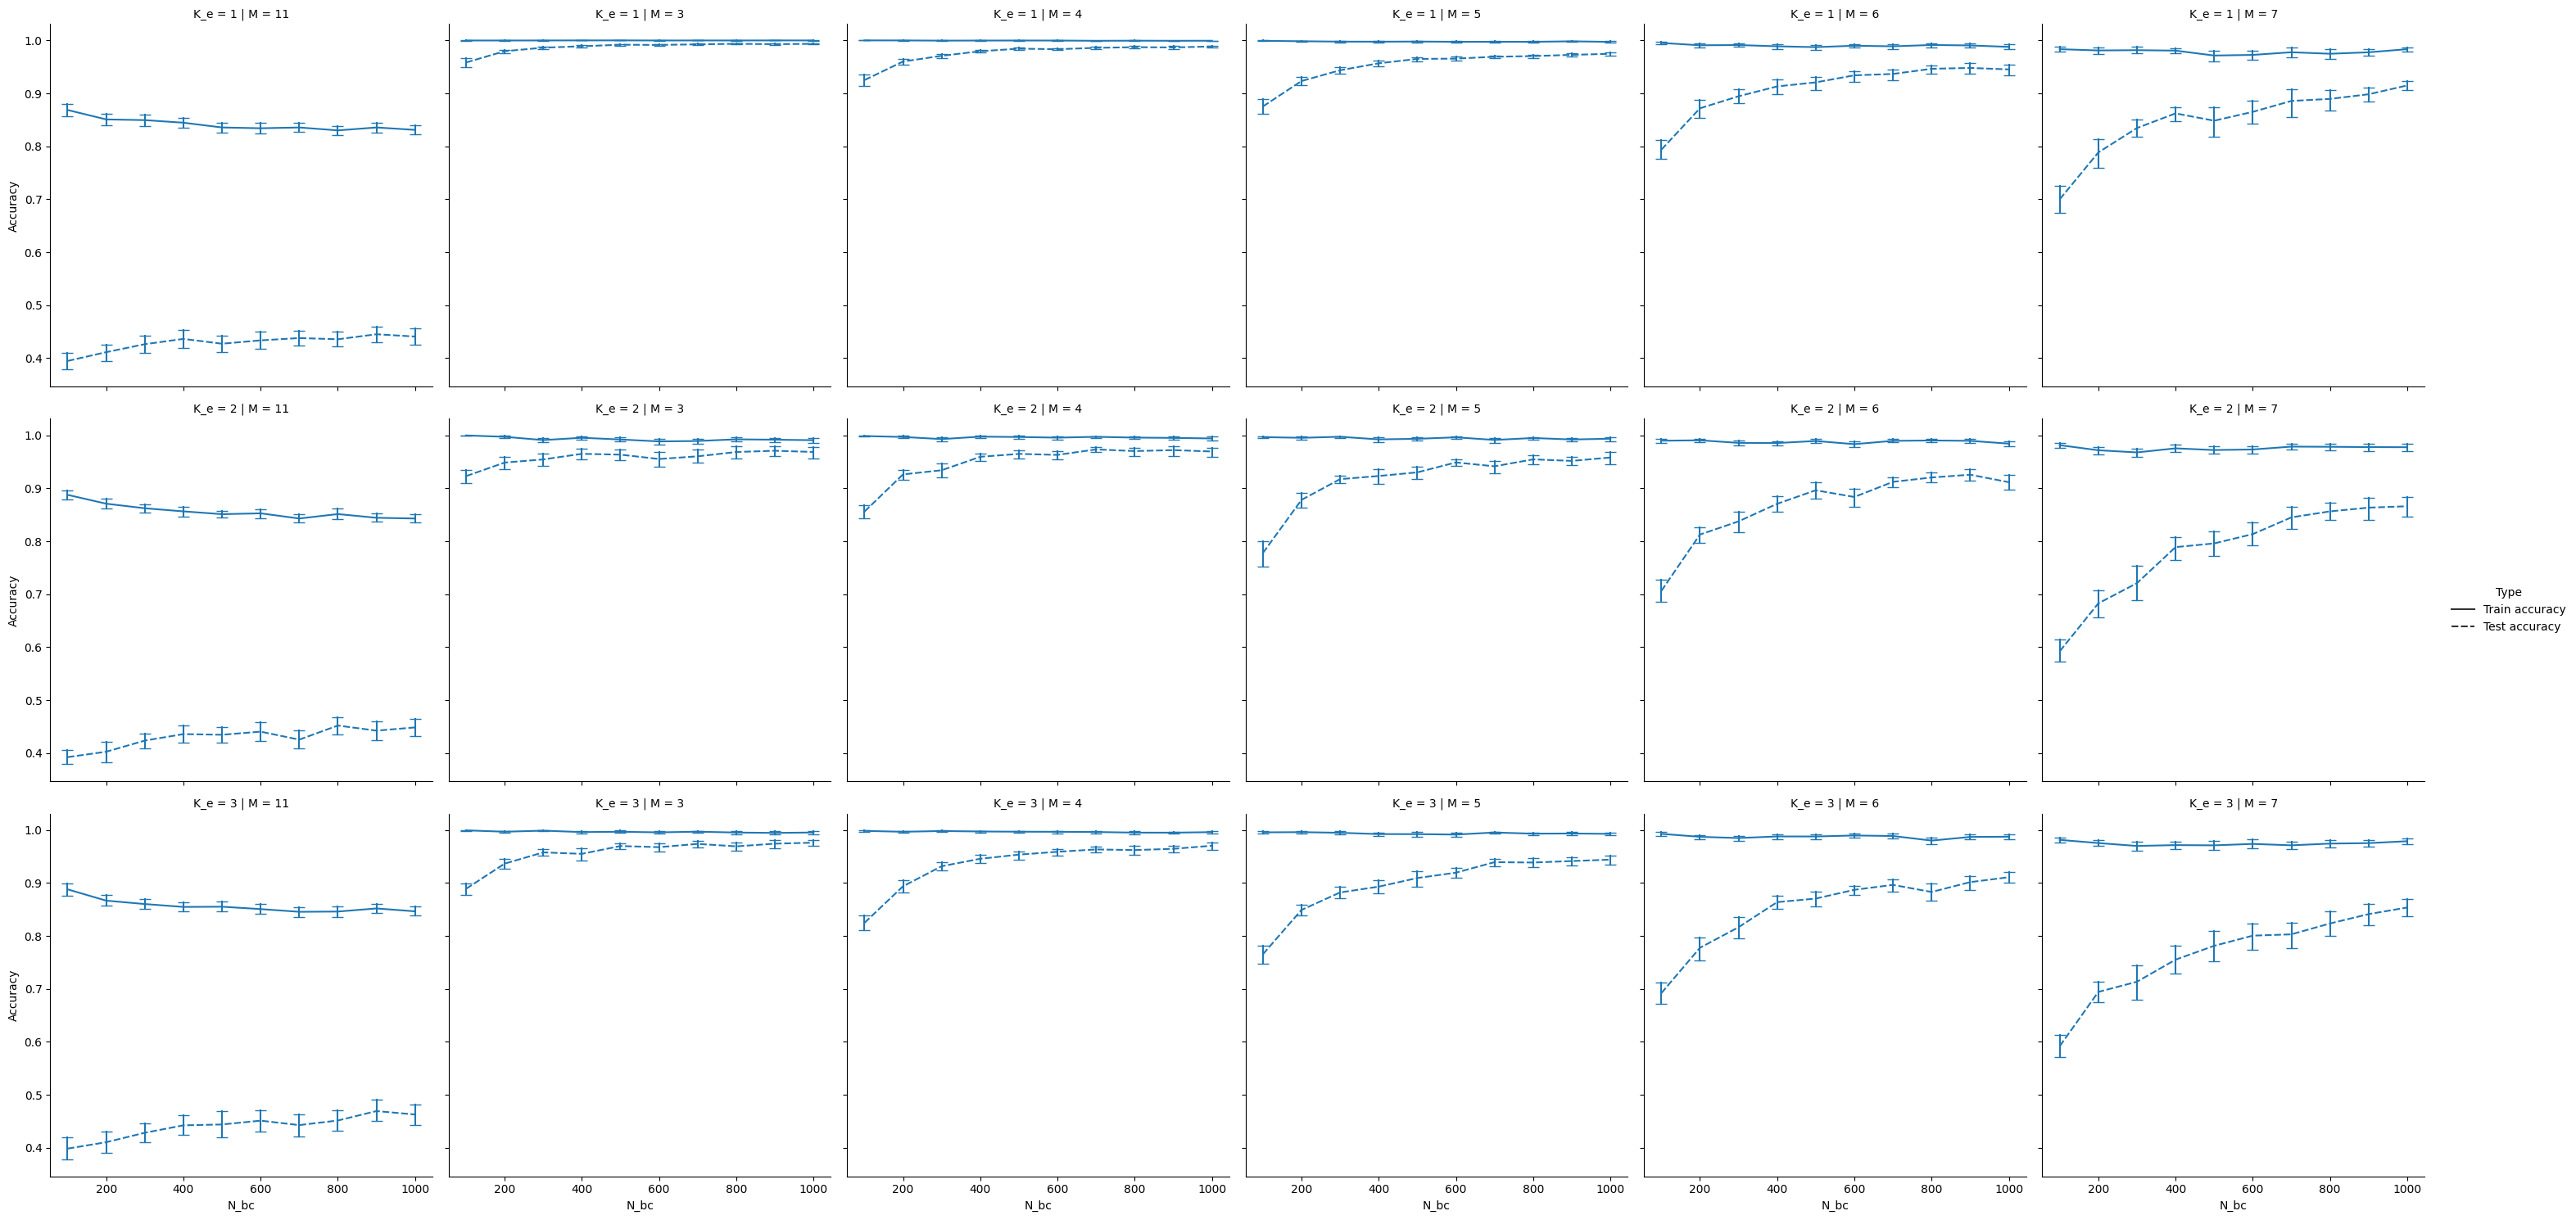

In [30]:
sns.relplot(
    data=melt(df[(df["K_o"] == df["K_e"]) & (df["Error"] == 0)], id_vars=["N_bc", "K_e", "M"], value_vars=["Train accuracy", "Test accuracy"], var_name="Type", value_name="Accuracy"),
    x="N_bc",
    y="Accuracy",
    style="Type",
    row="K_e",
    col="M",
    # col_order=["7", "11", "15"],
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

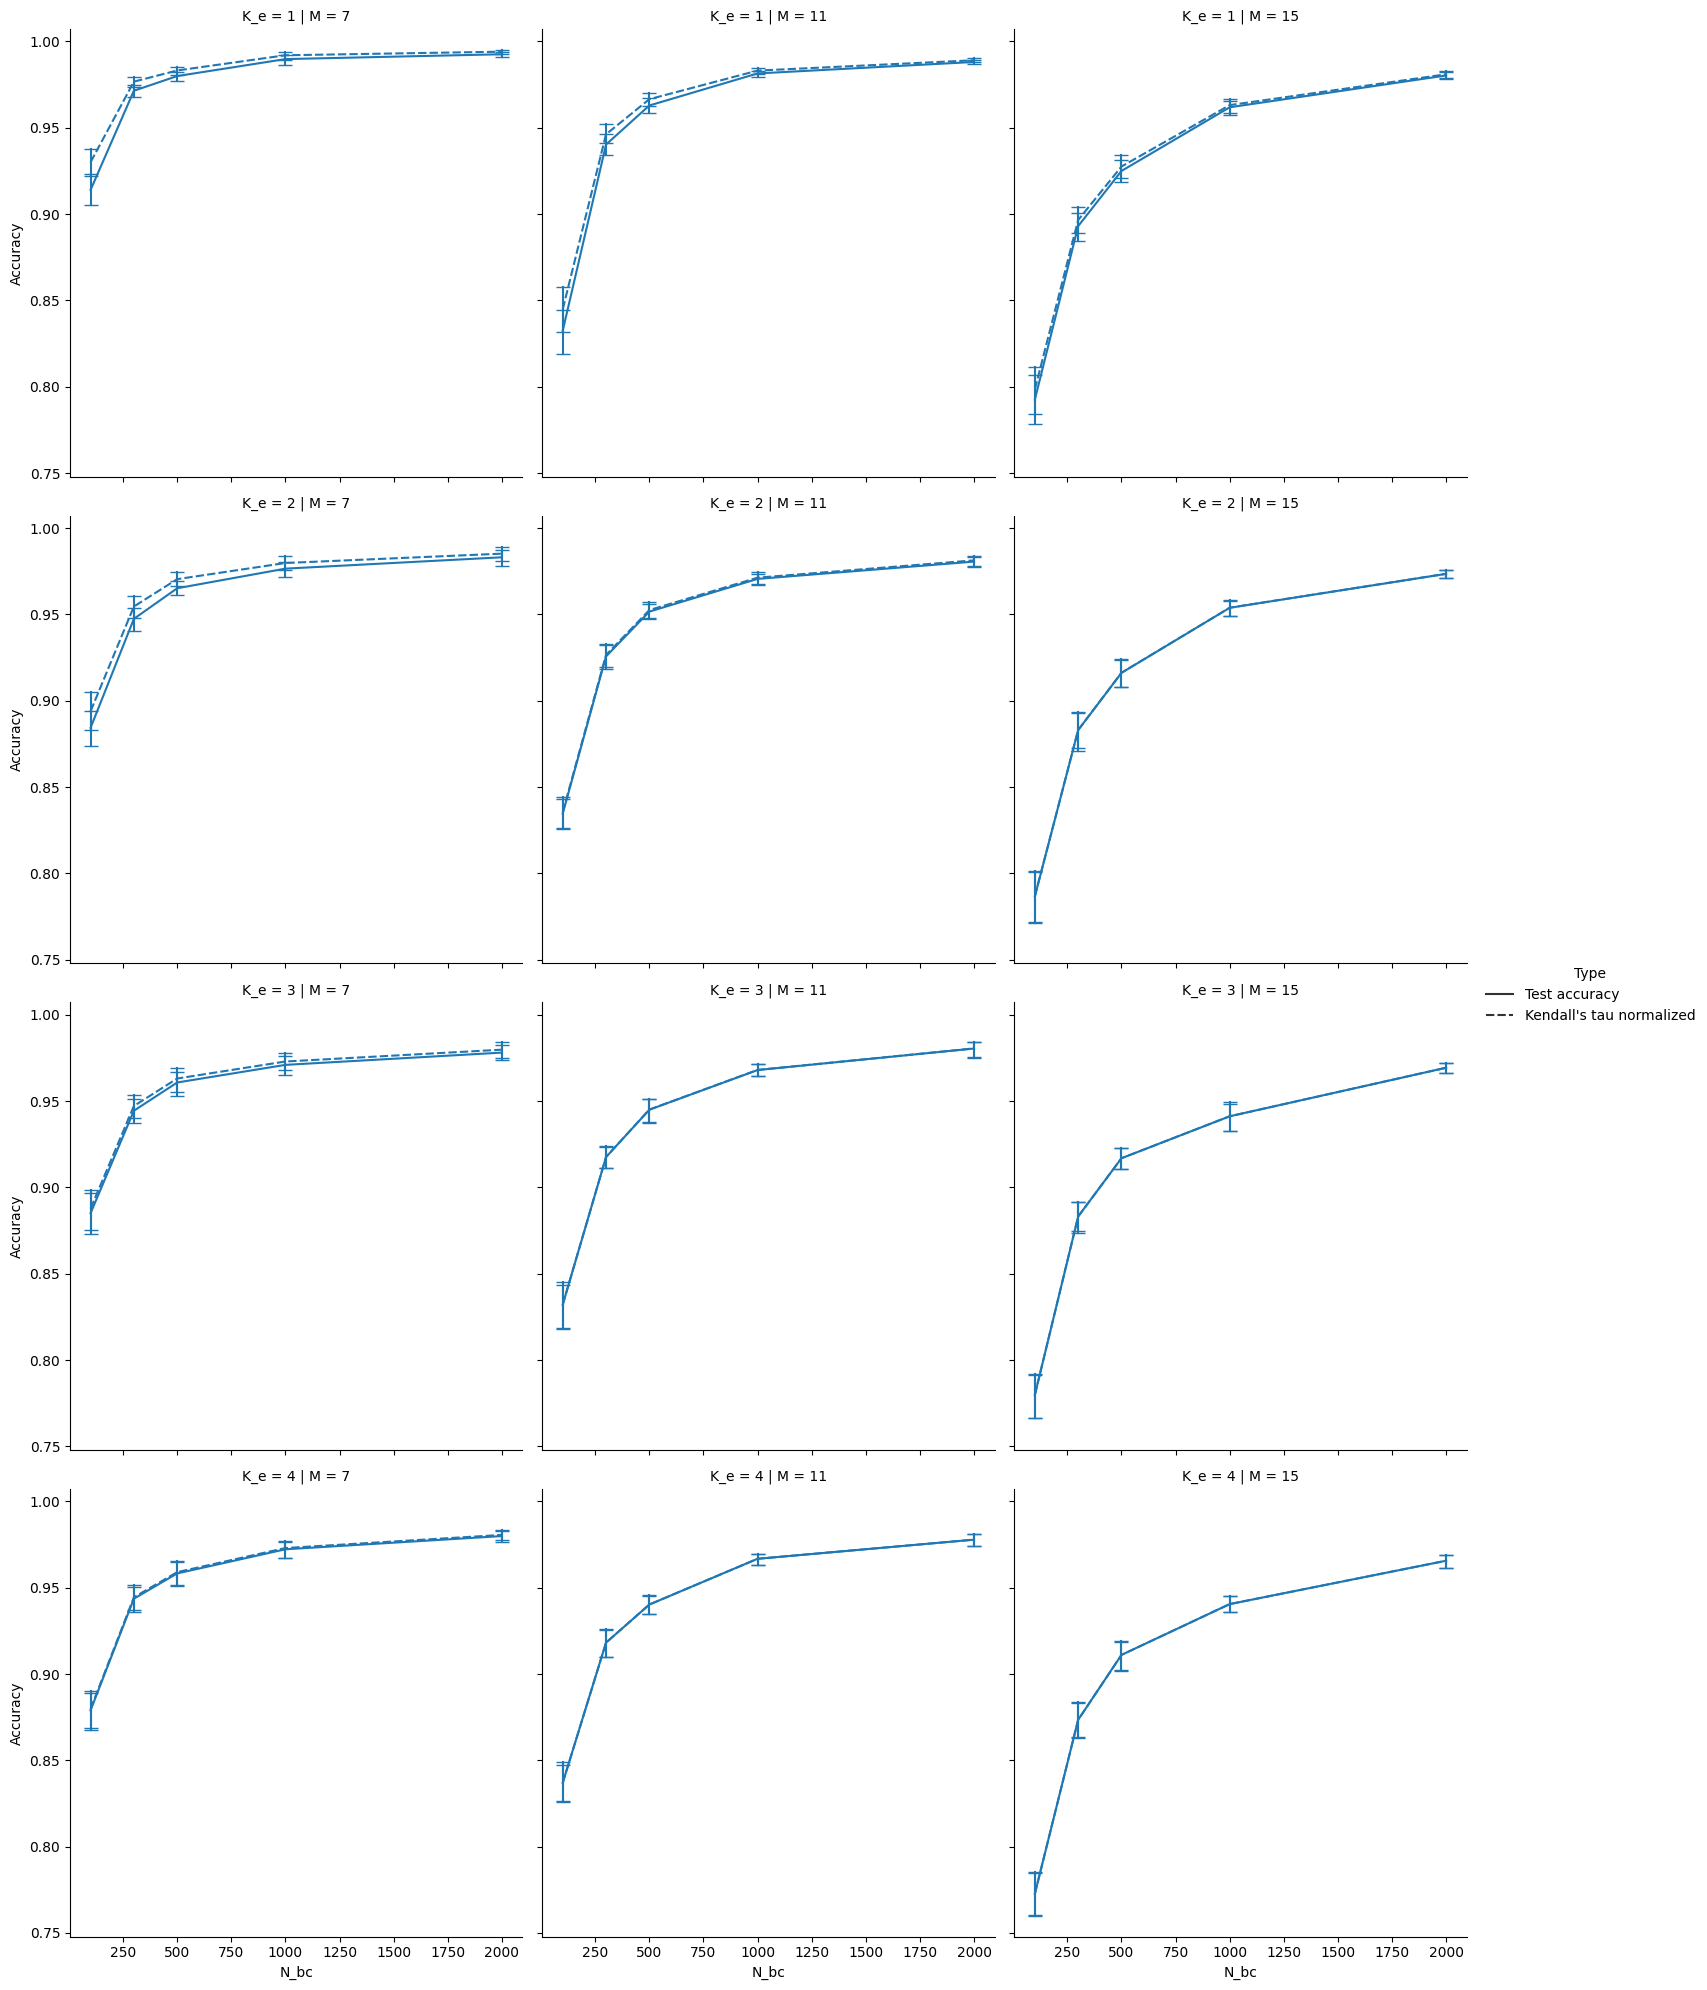

In [44]:

df["Kendall's tau normalized"] = (df["Kendall's tau"] + 1) / 2
sns.relplot(
    data=melt(df[(df["K_o"] == df["K_e"]) & (df["Error"] == 0)], id_vars=["N_bc", "K_e", "M"], value_vars=["Test accuracy", "Kendall's tau normalized"], var_name="Type", value_name="Accuracy"),
    x="N_bc",
    y="Accuracy",
    style="Type",
    row="K_e",
    col="M",
    col_order=["7", "11", "15"],
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

<Axes.ArtistList of 15 lines>
[ 100.  300.  500. 1000. 2000.]
[0.8816     0.85013333 0.84756    0.83632    0.83339   ]
[100.0 300.0 500.0 1000.0 2000.0]
[0.8816000000000002 0.8501333333333332 0.84756 0.8363200000000001 0.83339]
[100.0 300.0 500.0 1000.0 2000.0]
[0.8716000000000002 0.8407983333333334 0.8387600000000001 0.8259785
 0.823267]
[100.0 300.0 500.0 1000.0 2000.0]
[0.8916 0.8591350000000001 0.8566030000000001 0.8473 0.84325675]
[ 100.  300.  500. 1000. 2000.]
[0.892      0.87113333 0.85832    0.85162    0.8502    ]
[100.0 300.0 500.0 1000.0 2000.0]
[0.8919999999999999 0.8711333333333332 0.8583199999999997
 0.8516199999999998 0.8502000000000001]
[100.0 300.0 500.0 1000.0 2000.0]
[0.8815949999999999 0.8629316666666665 0.8471559999999999 0.8422185
 0.8424795]
[100.0 300.0 500.0 1000.0 2000.0]
[0.9024 0.8793333333333334 0.868162 0.8608410000000001 0.8572405]
[ 100.  300.  500. 1000. 2000.]
[0.8886  0.8644  0.85172 0.84638 0.84857]
[100.0 300.0 500.0 1000.0 2000.0]
[0.8886 0.8644000

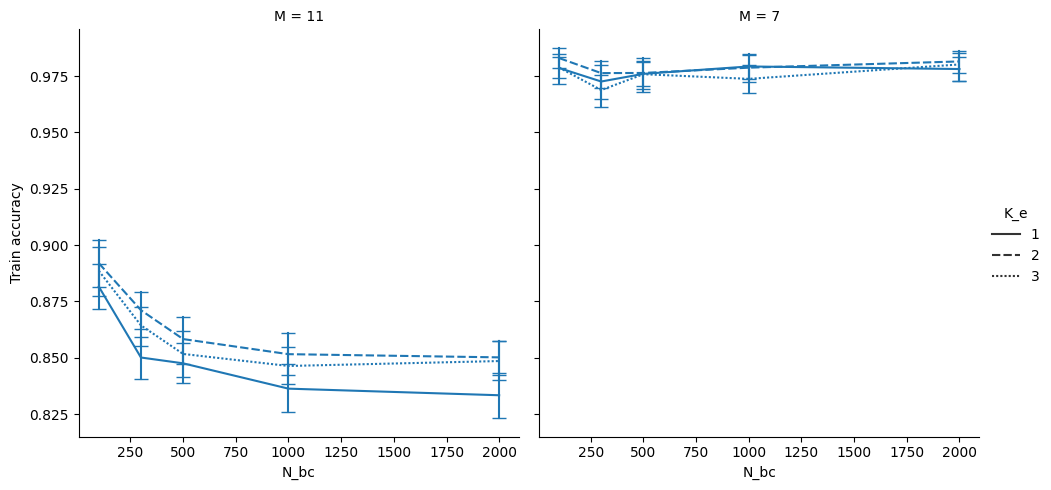

In [7]:
g = sns.relplot(
    data=df, #[(df["K_o"] == df["K_e"]) & (df["Error"] == 0)],
    x="N_bc",
    y="Train accuracy",
    style="K_e",
    col="M",
    # col_order=["7", "11", "15"],
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)
# g.set(ylim=(0.91, None))

for ax in g.axes.flat:
    print(ax.lines)
    for line in ax.lines:
        print(line.get_xdata())
        print(line.get_ydata())

<Axes.ArtistList of 15 lines>
[ 100.  300.  500. 1000. 2000.]
[0.69341226 0.70393683 0.70715367 0.71848529 0.72281956]
[100.0 300.0 500.0 1000.0 2000.0]
[0.6934122645290581 0.7039368336673347 0.7071536673346693
 0.7184852905811623 0.7228195591182365]
[100.0 300.0 500.0 1000.0 2000.0]
[0.6829827895791583 0.6939654549098198 0.6966909058116233
 0.7055342765531062 0.7115942364729461]
[100.0 300.0 500.0 1000.0 2000.0]
[0.7041293587174349 0.7148375871743486 0.7172188216432865
 0.7306608056112224 0.7339992344689379]
[ 100.  300.  500. 1000. 2000.]
[0.70300473 0.72126974 0.72807535 0.73180874 0.74460265]
[100.0 300.0 500.0 1000.0 2000.0]
[0.7030047294589178 0.7212697394789578 0.7280753507014027 0.73180873747495
 0.7446026452905811]
[100.0 300.0 500.0 1000.0 2000.0]
[0.6930246412825652 0.7124544649298596 0.7167843486973947
 0.7210173146292586 0.7360910180360722]
[100.0 300.0 500.0 1000.0 2000.0]
[0.7123364809619238 0.7298118476953908 0.7377808416833666
 0.7430461122244489 0.753843735470942]
[ 1

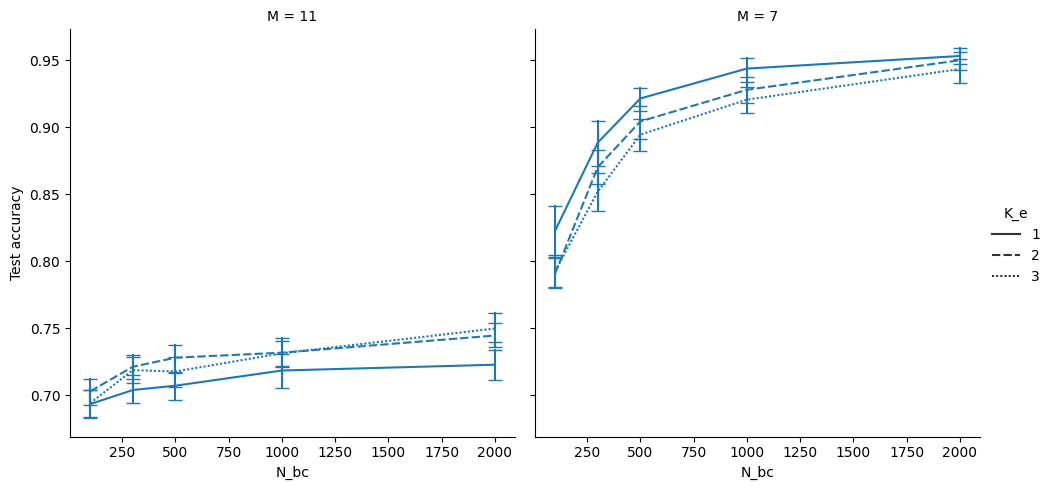

In [8]:
g = sns.relplot(
    data=df[(df["K_o"] == df["K_e"]) & (df["Error"] == 0)],
    x="N_bc",
    y="Test accuracy",
    style="K_e",
    col="M",
    # col_order=["7", "11", "15"],
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

for ax in g.axes.flat:
    print(ax.lines)
    for line in ax.lines:
        print(line.get_xdata())
        print(line.get_ydata())

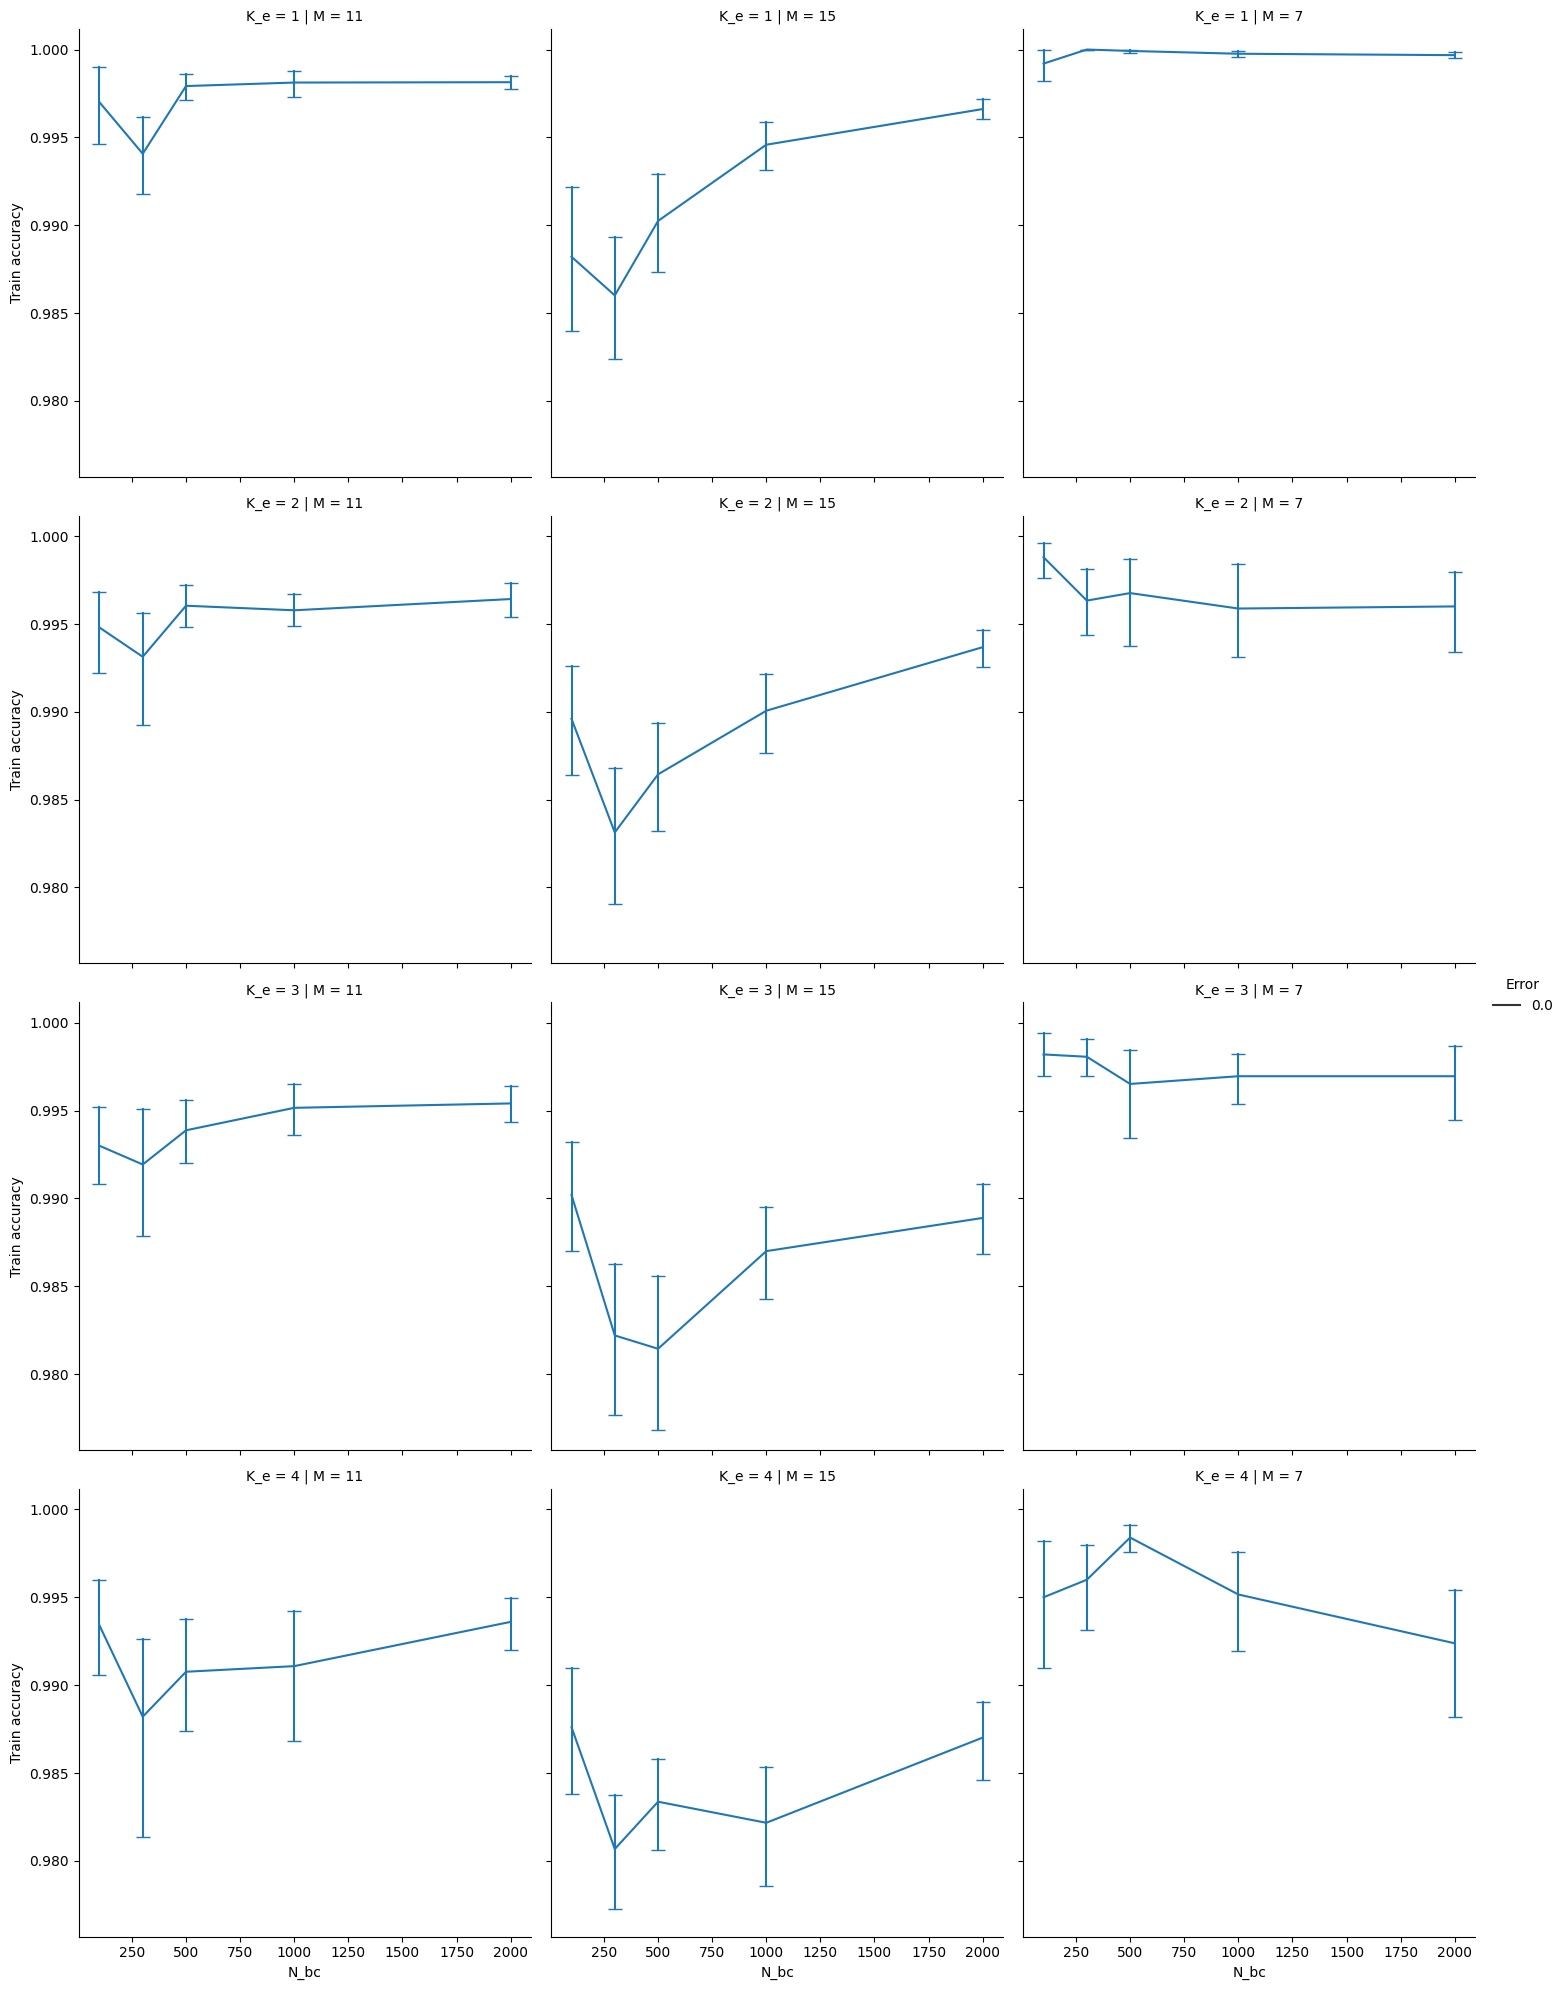

In [7]:
sns.relplot(
    data=df[(df["K_o"] == df["K_e"]) & (df["Error"] == 0)],
    x="N_bc",
    y="Train accuracy",
    style="Error",
    row="K_e",
    col="M",
    # col_order=["7", "11", "15"],
    kind="line",
    errorbar=("ci", 95),
    err_style="bars",
    err_kws={"capsize": 5},
)

In [26]:
df[(df["K_e"] == "1") & (df["M"] == "6") & (df["N_bc"] == 400)]

,Time,Train accuracy,Test accuracy,Kendall's tau,General seed,A train seed,Model seed,D train seed,Error seed,Learn seed,...,Max iter non improving,Seed,A train seed.1,Model seed.1,D train seed.1,Error seed.1,Learn seed.1,A test seed.1,Unnamed: 42,Kendall's tau normalized
81,118.544178,1.0000,0.946148,0.889526,256110578609729101862585460141556161426,549956961,697440500,3197436042,3657764025,518083895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944763
204,192.675899,0.9600,0.937218,0.897369,107461046360522500437008057551383044186,2211554691,3478728353,3796495717,57634087,2081004075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.948684
328,201.040958,0.9550,0.876385,0.791530,217761476664476927921267116929679414268,2792690183,2035142570,505225441,2633948105,3914576721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.895765
442,193.311765,0.9675,0.937659,0.885739,93381229483196611720434800688613165356,3325234965,3900086480,1524146285,52024967,216085431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.942869
562,195.764238,0.9900,0.929595,0.879673,58592568703839682217706839055734123135,1946308309,3496698876,2132165807,12539140,2966398904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.939837
680,188.359165,0.9425,0.891984,0.802856,103138385273348629014960040719116691182,1946787313,4235091904,3707332843,4106246464,197711552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.901428
807,191.655193,0.9825,0.948337,0.914978,241597072967783654453610824880229967243,2740907946,878616551,4047094304,2715409024,3117034958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957489
926,191.050363,0.9650,0.960409,0.930714,318807601947142854734078426450345800255,2483363952,243411234,1511985591,2234177777,2269386513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965357
1044,191.921748,0.9875,0.965459,0.934882,105306924479311070197118796597073929672,897387647,3341126383,1963905751,177968058,1721385704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.967441
1164,194.495657,0.9925,0.958878,0.929844,61712200365821168218700969763219540997,981232567,471734123,2429820855,372081613,3105864052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.964922
